In [1]:

# Install required libraries
# Import required libraries
import random
import math
import gymnasium as gym
from gymnasium import spaces
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import namedtuple, deque
from itertools import count
import tensorflow as tf
import keras
import os
# print("Num CPUs Available: ", tf.config.experimental.list_physical_devices('CPU'))

# device = torch.device(
#     "cuda" if torch.cuda.is_available() else
#     "cpu"
# )

# print(device)
# CUDA_LAUNCH_BLOCKING=1

In [ ]:
def DQN(obs, actions):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(32, input_dim=obs, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(actions, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae']) #auto learning rate
    return model

class Agent:
    def __init__(self, obs, actions):

        self.actions = actions
        self.discount_factor = 0.99 #gamma
        self.epsilon = 1
        self.epsilon_decay = 0.9954
        self.epsilon_min = 0.01
        self.batch_size = 128
        self.size = 5000
        self.state_mem = np.zeros((self.size,obs))
        self.next_state_mem = np.zeros((self.size,obs))
        self.action_mem = np.zeros(self.size, dtype = int )
        self.reward_mem = np.zeros(self.size)
        self.done_mem = np.zeros(self.size,dtype=np.float32)
        self.pointer = 0
        self.policy_net = DQN(obs, actions)
        self.target_net = DQN(obs, actions) 

    def append(self, state, action, reward, next_state, done):
        i = self.pointer % self.size #get index
        self.state_mem[i] = state
        self.next_state_mem[i] = next_state
        self.reward_mem[i] = reward 
        self.done_mem[i] = done
        self.action_mem[i] = action
        self.pointer +=1

    def sample(self,batch):
        mem = min(self.pointer,self.size) # get range to choose mem from
        batch = np.random.choice(mem,batch) # choose random indices
        states = self.state_mem[batch]
        next_states = self.next_state_mem[batch]
        actions = self.action_mem[batch]
        rewards = self.reward_mem[batch]
        done = self.done_mem[batch]
        return states, actions, rewards, next_states, done
    
    def select_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.actions)  # random action
        state = state[np.newaxis,:]
        q_values = self.policy_net.predict(state, verbose=0)
        return np.argmax(q_values)  # best action

    def replay(self):
        if self.pointer < self.batch_size:
            return
        # print("learn god damn it")
        state, action, reward, next_state, done = self.sample(self.batch_size)

        # estimate cuurent q values
        q_eval = self.policy_net.predict(state,verbose = 0)
        # set target values
        q_next = self.target_net.predict(next_state, verbose = 0)
        q_target = q_eval.copy()
        batch_index = np.arange(self.batch_size, dtype=np.int32)
        # print('batch',batch_index)
        # print(action)
        q_target[batch_index,action] = reward + self.discount_factor *np.max(q_next,axis=1) *done

        self.policy_net.fit(state, q_target, verbose=0,)
        return
        


Episode: 0, Timesteps: 28
Episode: 1, Timesteps: 40


C:\Users\corvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


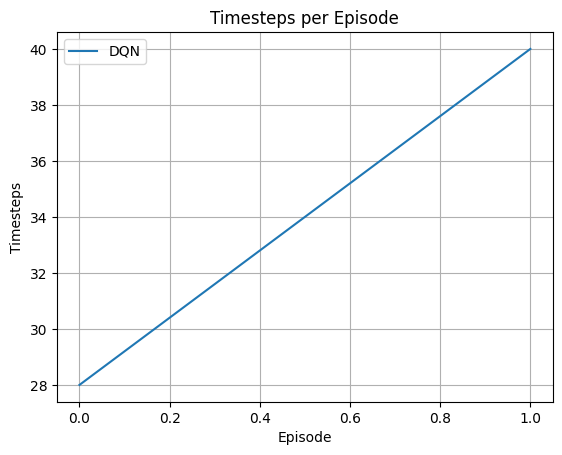

Episode: 2, Timesteps: 22
Episode: 3, Timesteps: 11
Episode: 4, Timesteps: 33
Episode: 5, Timesteps: 13
Episode: 6, Timesteps: 17
Episode: 7, Timesteps: 34
Episode: 8, Timesteps: 28
Episode: 9, Timesteps: 17
Episode: 10, Timesteps: 13
Episode: 11, Timesteps: 25
Episode: 12, Timesteps: 7
Episode: 13, Timesteps: 17
Episode: 14, Timesteps: 13
Episode: 15, Timesteps: 13
Episode: 16, Timesteps: 10
Episode: 17, Timesteps: 12
Episode: 18, Timesteps: 26
Episode: 19, Timesteps: 10
Episode: 20, Timesteps: 9
Episode: 21, Timesteps: 32
Episode: 22, Timesteps: 20
Episode: 23, Timesteps: 8
Episode: 24, Timesteps: 30
Episode: 25, Timesteps: 16
Episode: 26, Timesteps: 11
Episode: 27, Timesteps: 10
Episode: 28, Timesteps: 14
Episode: 29, Timesteps: 22
Episode: 30, Timesteps: 33
Episode: 31, Timesteps: 13
Episode: 32, Timesteps: 15
Episode: 33, Timesteps: 20
Episode: 34, Timesteps: 71
Episode: 35, Timesteps: 27
Episode: 36, Timesteps: 26
Episode: 37, Timesteps: 13
Episode: 38, Timesteps: 50
Episode: 39,

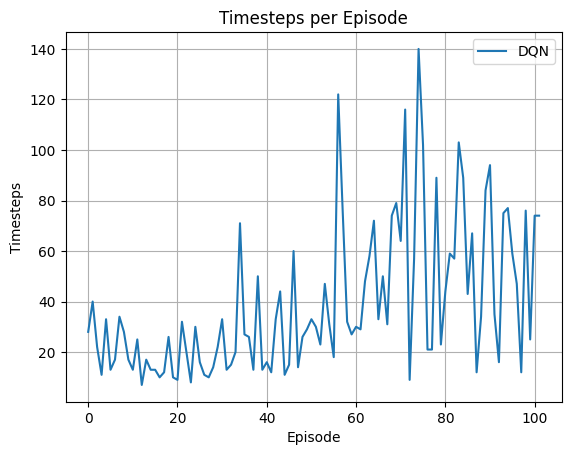

Episode: 102, Timesteps: 52
Episode: 103, Timesteps: 16
Episode: 104, Timesteps: 108
Episode: 105, Timesteps: 151
Episode: 106, Timesteps: 16
Episode: 107, Timesteps: 120
Episode: 108, Timesteps: 23
Episode: 109, Timesteps: 15
Episode: 110, Timesteps: 35
Episode: 111, Timesteps: 72
Episode: 112, Timesteps: 222
Episode: 113, Timesteps: 123
Episode: 114, Timesteps: 29
Episode: 115, Timesteps: 193
Episode: 116, Timesteps: 79
Episode: 117, Timesteps: 126
Episode: 118, Timesteps: 24
Episode: 119, Timesteps: 219
Episode: 120, Timesteps: 162
Episode: 121, Timesteps: 31
Episode: 122, Timesteps: 67
Episode: 123, Timesteps: 17
Episode: 124, Timesteps: 88
Episode: 125, Timesteps: 42
Episode: 126, Timesteps: 83
Episode: 127, Timesteps: 152
Episode: 128, Timesteps: 11
Episode: 129, Timesteps: 77
Episode: 130, Timesteps: 262
Episode: 131, Timesteps: 91
Episode: 132, Timesteps: 22
Episode: 133, Timesteps: 151
Episode: 134, Timesteps: 67
Episode: 135, Timesteps: 170
Episode: 136, Timesteps: 142
Episod

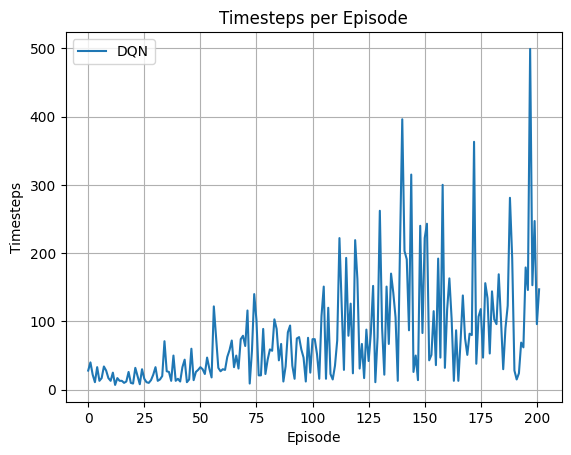

Episode: 202, Timesteps: 204
Episode: 203, Timesteps: 20
Episode: 204, Timesteps: 57
Episode: 205, Timesteps: 295
Episode: 206, Timesteps: 19
Episode: 207, Timesteps: 74
Episode: 208, Timesteps: 192
Episode: 209, Timesteps: 199
Episode: 210, Timesteps: 217
Episode: 211, Timesteps: 250
Episode: 212, Timesteps: 267
Episode: 213, Timesteps: 189
Episode: 214, Timesteps: 224
Episode: 215, Timesteps: 31
Episode: 216, Timesteps: 241
Episode: 217, Timesteps: 159
Episode: 218, Timesteps: 185
Episode: 219, Timesteps: 160
Episode: 220, Timesteps: 30
Episode: 221, Timesteps: 174
Episode: 222, Timesteps: 152
Episode: 223, Timesteps: 149
Episode: 224, Timesteps: 167
Episode: 225, Timesteps: 162
Episode: 226, Timesteps: 181
Episode: 227, Timesteps: 157
Episode: 228, Timesteps: 147
Episode: 229, Timesteps: 157
Episode: 230, Timesteps: 152
Episode: 231, Timesteps: 111
Episode: 232, Timesteps: 170
Episode: 233, Timesteps: 192
Episode: 234, Timesteps: 158
Episode: 235, Timesteps: 164
Episode: 236, Timest

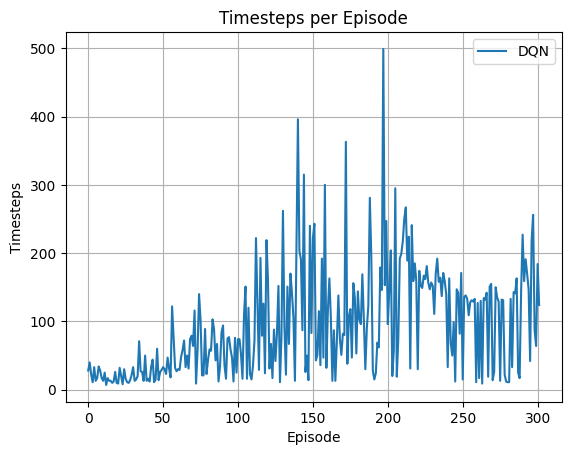

Episode: 302, Timesteps: 218
Episode: 303, Timesteps: 184
Episode: 304, Timesteps: 141
Episode: 305, Timesteps: 183
Episode: 306, Timesteps: 49
Episode: 307, Timesteps: 161
Episode: 308, Timesteps: 243
Episode: 309, Timesteps: 24
Episode: 310, Timesteps: 167
Episode: 311, Timesteps: 152
Episode: 312, Timesteps: 142
Episode: 313, Timesteps: 168
Episode: 314, Timesteps: 204
Episode: 315, Timesteps: 36
Episode: 316, Timesteps: 279
Episode: 317, Timesteps: 222
Episode: 318, Timesteps: 306
Episode: 319, Timesteps: 218
Episode: 320, Timesteps: 42
Episode: 321, Timesteps: 138
Episode: 322, Timesteps: 155
Episode: 323, Timesteps: 120
Episode: 324, Timesteps: 159
Episode: 325, Timesteps: 148
Episode: 326, Timesteps: 33
Episode: 327, Timesteps: 29
Episode: 328, Timesteps: 131
Episode: 329, Timesteps: 211
Episode: 330, Timesteps: 243
Episode: 331, Timesteps: 239
Episode: 332, Timesteps: 239
Episode: 333, Timesteps: 374
Episode: 334, Timesteps: 52
Episode: 335, Timesteps: 231
Episode: 336, Timeste

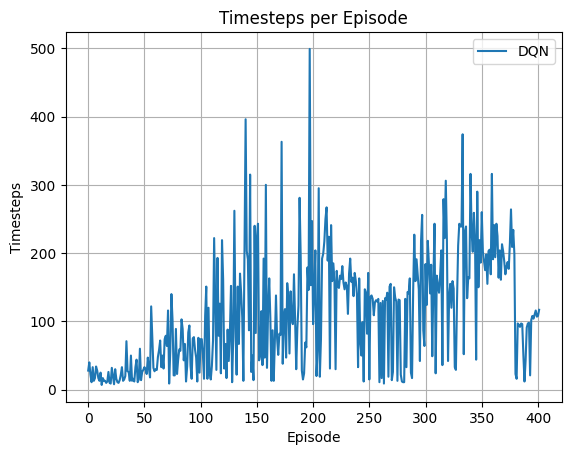

Episode: 402, Timesteps: 104
Episode: 403, Timesteps: 107
Episode: 404, Timesteps: 118
Episode: 405, Timesteps: 101
Episode: 406, Timesteps: 119
Episode: 407, Timesteps: 115
Episode: 408, Timesteps: 112
Episode: 409, Timesteps: 126
Episode: 410, Timesteps: 142
Episode: 411, Timesteps: 121
Episode: 412, Timesteps: 26
Episode: 413, Timesteps: 99
Episode: 414, Timesteps: 116
Episode: 415, Timesteps: 118
Episode: 416, Timesteps: 109
Episode: 417, Timesteps: 114
Episode: 418, Timesteps: 113
Episode: 419, Timesteps: 106
Episode: 420, Timesteps: 121
Episode: 421, Timesteps: 108
Episode: 422, Timesteps: 206
Episode: 423, Timesteps: 114
Episode: 424, Timesteps: 109
Episode: 425, Timesteps: 95
Episode: 426, Timesteps: 112
Episode: 427, Timesteps: 118
Episode: 428, Timesteps: 100
Episode: 429, Timesteps: 106
Episode: 430, Timesteps: 119
Episode: 431, Timesteps: 108
Episode: 432, Timesteps: 108
Episode: 433, Timesteps: 90
Episode: 434, Timesteps: 105
Episode: 435, Timesteps: 117
Episode: 436, Time

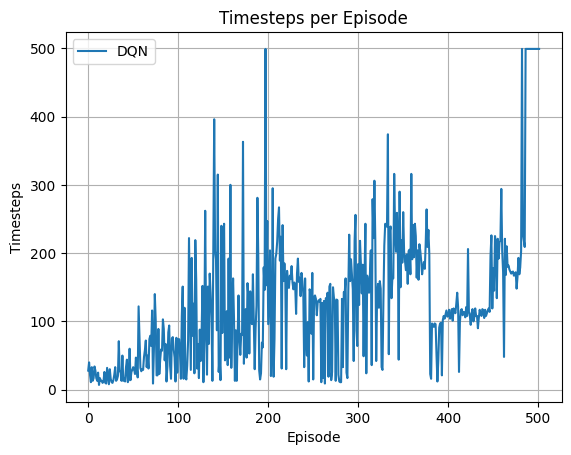

Episode: 502, Timesteps: 499
Episode: 503, Timesteps: 499
Episode: 504, Timesteps: 371
Episode: 505, Timesteps: 31
Episode: 506, Timesteps: 34


KeyboardInterrupt: 

In [ ]:

if __name__ == "__main__":
    env = gym.make("CartPole-v1")
    obs = env.observation_space.shape[0]
    actions = env.action_space.n
    agent = Agent(obs, actions)
    max_episodes = 2000
    reward_per_episode = []

    for episode in range(max_episodes):
        state, info = env.reset()
        
        terminated,truncated = False,False
        if episode % 5 == 0:
            agent.target_net.set_weights(agent.policy_net.get_weights())
        
        for timestep in range(500):
            action = agent.select_action(state)
            # print('action:', action)
            next_state, reward, terminated, truncated, _ = env.step(action)
            result = terminated or truncated
            if terminated == True:
                reward = -1
            if result == True:
                done = 0
            else:
                done = 1
            agent.append(state=state, action=action, reward=reward, next_state=next_state, done=done)
            state = next_state
            if timestep %5 == 0 :
                agent.replay()  # Update network weights
            if result == True:
                reward_per_episode.append(timestep)
                print(f'Episode: {episode}, Timesteps: {timestep}')
                break
        if episode % 100 == True:
            plt.figure()
            plt.plot(reward_per_episode, label='DQN')
            plt.xlabel('Episode')
            plt.ylabel('Timesteps')
            plt.title('Timesteps per Episode')
            plt.legend()
            plt.grid()
            plt.show()
            # print("saved_weights")
            a= agent.policy_net.get_weights()
            # with open('cartweight.pickle', 'wb') as handle:
            #     pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)
        agent.epsilon = max(agent.epsilon_min, agent.epsilon * agent.epsilon_decay)

    plt.figure()
    plt.plot(reward_per_episode, label='DQN')
    plt.xlabel('Episode')
    plt.ylabel('Timesteps')
    plt.title('Timesteps per Episode')
    plt.legend()
    plt.grid()
    plt.show()